In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
#input_threads = 6 # 2^p
#input_nrhs = 7  # 2^p

circuitList = ['circuit_2', 'circuit_4', 'scircuit', 'ASIC_680ks']
cpuList = ['c6i', 'c6a', 'c6g', 'c7g', 'T2A', 'C2', 'C2D']

def getData(cpuIndex, circuitIndex):
    filePath = './' + cpuList[cpuIndex] + '/results_scale_' + circuitList[circuitIndex] + '.csv'
    print(filePath)
    df = pd.read_csv(filePath)
    return df

cirSelected = 3

# From Scale runs on c7g
#data = pd.read_csv('./c7g/results_scale_circuit_2.csv')
#data = pd.read_csv('./c7g/results_scale_circuit_4.csv')
#data = pd.read_csv('./c7g/results_scale_scircuit.csv')
#data = pd.read_csv('./c7g/results_scale_ASIC_680ks.csv')


# From Scale runs on c6g
#data = pd.read_csv('./c6g/results_scale_circuit_2.csv')
#data = pd.read_csv('./c6g/results_scale_circuit_4.csv')
#data = pd.read_csv('./c6g/results_scale_scircuit.csv')
#data = pd.read_csv('./c6g/results_scale_ASIC_680ks.csv')

# From Scale runs on c6a
#data = pd.read_csv('./c6a/results_scale_circuit_2.csv')
#data = pd.read_csv('./c6a/results_scale_circuit_4.csv')
#data = pd.read_csv('./c6a/results_scale_scircuit.csv')
#data = pd.read_csv('./c6a/results_scale_ASIC_680ks.csv')

# From Scale runs on c6i
#data = pd.read_csv('./c6i/results_scale_circuit_2.csv')
#data = pd.read_csv('./c6i/results_scale_circuit_4.csv')
#data = pd.read_csv('./c6i/results_scale_scircuit.csv')
#data = pd.read_csv('./c6i/results_scale_ASIC_680ks.csv')

data = getData(0, 0)


print(data.head())

./c6i/results_scale_circuit_2.csv
   Unnamed: 0  index  threads  nrhs   time1   time2
0           0      0      1.0   1.0  884.33  257.72
1           1      1      1.0   2.0  922.39  288.72
2           2      2      1.0   4.0  959.58  248.23
3           3      3      1.0   8.0  879.39  292.82
4           4      4      1.0  16.0  930.34  422.68


In [133]:
#nrhs = [1,2,4,8,16,32,64,128]

#nrhs = np.arange(0, input_nrhs+1)
#nrhs = np.power(2, nrhs).tolist()

#threads = np.arange(0, input_threads+1)
#threads = np.power(2, threads).tolist()

#grid_solve = np.zeros((len(threads),len(nrhs)))
#grid_factor = np.zeros((len(threads),len(nrhs)))
#grid_nrhs = np.zeros((len(threads),len(nrhs)))

#grid_solve = []
#grid_factor = []
#grid_nrhs = []


#print(threads, nrhs)

In [134]:

def getGrid(df):

    grid_solve = np.zeros(len(df))
    grid_factors = np.zeros(len(df))
    grid_nrhs = np.zeros(len(df))

    for index, row in df.iterrows():
        threads_i = row['threads']
        nrhs_i = row['nrhs']
        time_factor_i = row['time1']
        time_solve_i = row['time2']
        
        #index_threads = threads.index(threads_i)
        #index_nrhs = nrhs.index(nrhs_i)
        
        #print(index_threads, index_nrhs)

        time_per_solve = time_solve_i / (threads_i * nrhs_i)
        time_per_nrhs = time_solve_i / (nrhs_i)
        time_per_factor = (time_factor_i) / (threads_i)

        #grid[index_threads, index_nrhs] = ref / (time_per_solve)
        
        #grid_solve[index_threads, index_nrhs] = (time_per_solve)
        #grid_factor[index_threads, index_nrhs] = (time_per_factor)
        #grid_nrhs[index_threads, index_nrhs] = (time_per_nrhs)

        grid_solve[index] = (time_per_solve)
        grid_factors[index] = (time_per_factor)
        grid_nrhs[index] = (time_per_nrhs)

    #print(grid_solve)
    return grid_solve, grid_factors, grid_nrhs
    


In [135]:
#list(map(str, nrhs))

In [136]:
#print(np.min(grid_solve))
#index = np.unravel_index(grid_solve.argmin(), grid_solve.shape)
#print(index)
#print(grid_solve[index])

In [137]:

chartData = []

for i in range(len(cpuList)):
    df = getData(i, cirSelected)
    grid_solve, grid_factor, grid_nrhs = getGrid(df)
    min = np.min(grid_solve)
    index = np.argmin(grid_solve)
    #print(min, index)
    #index = np.unravel_index(grid_solve.argmin(), grid_solve.shape)
    min_thr = df['threads'][index]
    min_nrhs = df['nrhs'][index]
    print(min, min_thr, min_nrhs)
    chartData.append([min, min_thr, min_nrhs, cpuList[i]])

print(chartData)

./c6i/results_scale_ASIC_680ks.csv
461.669921875 64.0 64.0
./c6a/results_scale_ASIC_680ks.csv
615.76171875 64.0 32.0
./c6g/results_scale_ASIC_680ks.csv
544.6142578125 64.0 32.0
./c7g/results_scale_ASIC_680ks.csv
373.3740234375 64.0 128.0
./T2A/results_scale_ASIC_680ks.csv
545.3372395833334 48.0 32.0
./C2/results_scale_ASIC_680ks.csv
544.6145833333334 60.0 64.0
./C2D/results_scale_ASIC_680ks.csv
420.8870442708333 48.0 128.0
[[461.669921875, 64.0, 64.0, 'c6i'], [615.76171875, 64.0, 32.0, 'c6a'], [544.6142578125, 64.0, 32.0, 'c6g'], [373.3740234375, 64.0, 128.0, 'c7g'], [545.3372395833334, 48.0, 32.0, 'T2A'], [544.6145833333334, 60.0, 64.0, 'C2'], [420.8870442708333, 48.0, 128.0, 'C2D']]


In [138]:
chartData.sort(key=lambda x: x[0])
print(chartData)

[[373.3740234375, 64.0, 128.0, 'c7g'], [420.8870442708333, 48.0, 128.0, 'C2D'], [461.669921875, 64.0, 64.0, 'c6i'], [544.6142578125, 64.0, 32.0, 'c6g'], [544.6145833333334, 60.0, 64.0, 'C2'], [545.3372395833334, 48.0, 32.0, 'T2A'], [615.76171875, 64.0, 32.0, 'c6a']]


In [139]:
# https://stackoverflow.com/questions/6473679/transpose-list-of-lists
plotData = list(map(list, zip(*chartData)))
print(plotData)

[[373.3740234375, 420.8870442708333, 461.669921875, 544.6142578125, 544.6145833333334, 545.3372395833334, 615.76171875], [64.0, 48.0, 64.0, 64.0, 60.0, 48.0, 64.0], [128.0, 128.0, 64.0, 32.0, 64.0, 32.0, 32.0], ['c7g', 'C2D', 'c6i', 'c6g', 'C2', 'T2A', 'c6a']]


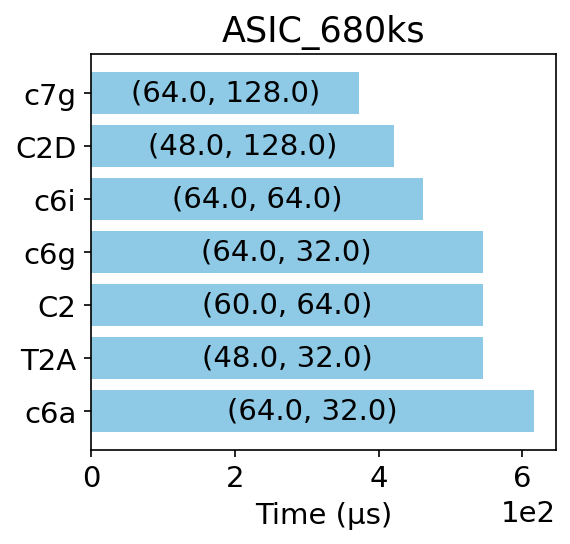

In [140]:
plt.style.use(['ipynb','colors5'])
fig = plt.figure(figsize=(4,3.5), dpi=150)
ax = fig.add_subplot(111)
ax.invert_yaxis()

bar1 = ax.barh(plotData[3], width=plotData[0])


ax.set_xlabel('Time (μs)')
ax.set_title(circuitList[cirSelected])

barLabel = []
for i in range(len(cpuList)):
    #text = f"{chartData[i][0].round(1)} ({chartData[i][1]}, {chartData[i][2]})"
    text = f"({chartData[i][1]}, {chartData[i][2]})"
    barLabel.append(text)

ax.bar_label(bar1, barLabel, label_type='center')

fig.savefig('scalable_bar1.svg', format='svg')

In [141]:
chartData = []

for i in range(len(cpuList)):
    df = getData(i, cirSelected)
    grid_solve, grid_factor, grid_nrhs = getGrid(df)
    grid_total = grid_nrhs + grid_factor
    min = np.min(grid_total)
    #index = np.unravel_index(grid_total.argmin(), grid_total.shape)
    index = np.argmin(grid_total)
    min_thr = df['threads'][index]
    min_nrhs = df['nrhs'][index]
    print(min, min_thr, min_nrhs)
    chartData.append([min, grid_factor[index], grid_nrhs[index], min_thr, min_nrhs, cpuList[i]])

print(chartData)
chartData.sort(key=lambda x: x[0])
print(chartData)

./c6i/results_scale_ASIC_680ks.csv
58308.046875 32.0 128.0
./c6a/results_scale_ASIC_680ks.csv
86050.46875 64.0 64.0
./c6g/results_scale_ASIC_680ks.csv
63955.546875 32.0 128.0
./c7g/results_scale_ASIC_680ks.csv
48290.90625 32.0 64.0
./T2A/results_scale_ASIC_680ks.csv
63820.15625 32.0 64.0
./C2/results_scale_ASIC_680ks.csv
67195.3125 48.0 64.0
./C2D/results_scale_ASIC_680ks.csv
39198.125 32.0 128.0
[[58308.046875, 42149.0625, 16158.984375, 32.0, 128.0, 'c6i'], [86050.46875, 46557.34375, 39493.125, 64.0, 64.0, 'c6a'], [63955.546875, 46087.1875, 17868.359375, 32.0, 128.0, 'c6g'], [48290.90625, 35272.1875, 13018.71875, 32.0, 64.0, 'c7g'], [63820.15625, 45090.0, 18730.15625, 32.0, 64.0, 'T2A'], [67195.3125, 38831.875, 28363.4375, 48.0, 64.0, 'C2'], [39198.125, 24751.40625, 14446.71875, 32.0, 128.0, 'C2D']]
[[39198.125, 24751.40625, 14446.71875, 32.0, 128.0, 'C2D'], [48290.90625, 35272.1875, 13018.71875, 32.0, 64.0, 'c7g'], [58308.046875, 42149.0625, 16158.984375, 32.0, 128.0, 'c6i'], [63820.

In [142]:
plotData = list(map(list, zip(*chartData)))
print(plotData)

[[39198.125, 48290.90625, 58308.046875, 63820.15625, 63955.546875, 67195.3125, 86050.46875], [24751.40625, 35272.1875, 42149.0625, 45090.0, 46087.1875, 38831.875, 46557.34375], [14446.71875, 13018.71875, 16158.984375, 18730.15625, 17868.359375, 28363.4375, 39493.125], [32.0, 32.0, 32.0, 32.0, 32.0, 48.0, 64.0], [128.0, 64.0, 128.0, 64.0, 128.0, 64.0, 64.0], ['C2D', 'c7g', 'c6i', 'T2A', 'c6g', 'C2', 'c6a']]


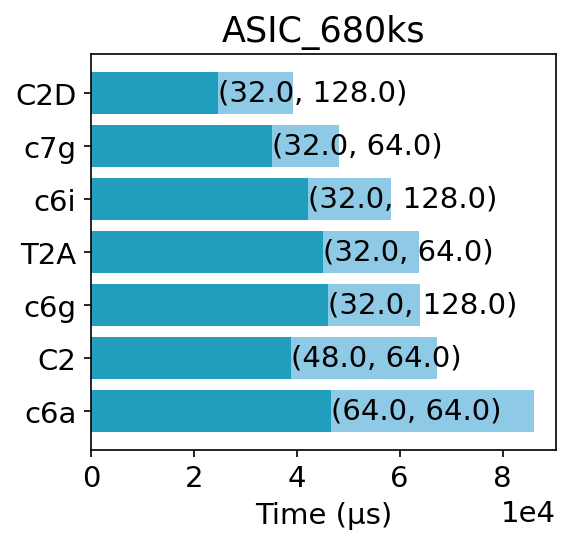

In [143]:
plt.style.use(['ipynb','colors5'])
fig = plt.figure(figsize=(4,3.5), dpi=150)
ax = fig.add_subplot(111)
ax.invert_yaxis()

bar2 = ax.barh(plotData[5], width=plotData[2], left=plotData[1])
bar1 = ax.barh(plotData[5], width=plotData[1])


ax.set_xlabel('Time (μs)')

ax.set_title(circuitList[cirSelected])

barLabel = []
for i in range(len(cpuList)):
    #text = f"{chartData[i][0].round(1)} ({chartData[i][1]}, {chartData[i][2]})"
    text = f"({chartData[i][3]}, {chartData[i][4]})"
    barLabel.append(text)

ax.bar_label(bar1, barLabel, label_type='edge')

fig.savefig('scalable_bar2.svg', format='svg')